In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Full pcl dataset 

In [ ]:
cd ../10MMBK/

[10000 20000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000
 40000 42000 43000 44000 45000 46000 47000 48000 49000 50000 55000 60000]


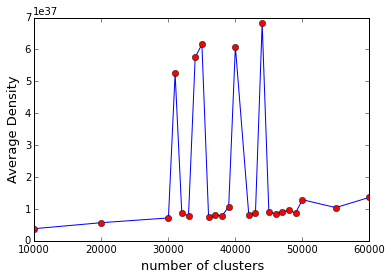

In [18]:
import glob
k_range = []
for i in glob.glob("../10MMBK/density*.txt"): 
    k_range.append(int(i.split(".")[2][15:])) 
#     print i.split(".")[2][15:]
k_range=sort(k_range)
print k_range
avrg_densities=[]
for n in k_range:
    avrg_densities.append(mean(np.loadtxt("../10MMBK/density{}.txt".format(n))))
plt.plot(k_range,avrg_densities)
plt.plot(k_range,avrg_densities,'o',color = 'red')
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("Average Density",fontsize=13)
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [26]:
print "ideal value of k =", 2097152/50. 

ideal value of k = 41943.04


[34383.160305, 30469.1988289, 17946.7460408, 18683.3599091, 24411.1758661, 29203.9517579, 19662.173856, 6357.49000001, 8624.914891, 2125.6114831, 11562.4136229, 25579.0853989, 16330.7373199, 12268.5649838, 13577.6017079, 14340.728282]
[40000.0, 40000.0, 46000.0, 48000.0, 34000.0, 44000.0, 50000.0, 10000.0, 20000.0, 32000.0, 30000.0, 60000.0, 42000.0, 32000.0, 36000.0, 38000.0]


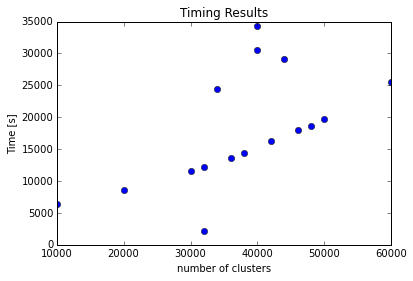

In [42]:
k_range_with_time=[]
kmeans_time = []
for i in glob.glob("10MMBK/*.out"):
    with open(i, 'r+') as f:
        lines = f.readlines()
        kval = 0
        for i in range(0, len(lines)):
#             print lines[i]
#             print lines[i][:5]
            if str(lines[i][15:19])=="test":
                kval = float(lines[i][:5])
            if (lines[i][:4]=="Time") and (kval!=0):
                k_range_with_time.append(kval)
                kmeans_time.append(float(lines[i][5:]))
                kval =0
print kmeans_time
print k_range_with_time
plt.title("Timing Results")
# plt.plot(sort(k_range_with_time),sort(kmeans_time))
plt.plot(k_range_with_time,kmeans_time,'o')
plt.xlabel("number of clusters")
plt.ylabel("Time [s]")

In [21]:
np.arange(30000,50000,2000)

array([30000, 32000, 34000, 36000, 38000, 40000, 42000, 44000, 46000, 48000])

In [25]:
print "Time for 30000 clusters = ",11562.4136229/60./60. ,"hrs"
print "Time for 40000 clusters = ",30469/60./60. ,"hrs"
print "Time for 50000 clusters = ",19662.173856/60./60. ,"hrs"

Time for 30000 clusters =  3.21178156192 hrs
Time for 40000 clusters =  8.46361111111 hrs
Time for 50000 clusters =  5.46171496 hrs


Don't submit 10 hour jobs on cori because the max limit is 12 hours so 10 hours is considered long so the job never gets queued in , use hoppper for this .